# Multivariate Exploration
## Diamonds dataset
*By Carla*

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Multivariate Exploration

In the previous workspace, I have looked at various bivariate relationships. I saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. I also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. 
Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of **multivariate plots**.

To start off with, I will create a plot of the relationship between price, carat, and clarity. In the previous workspace, I saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

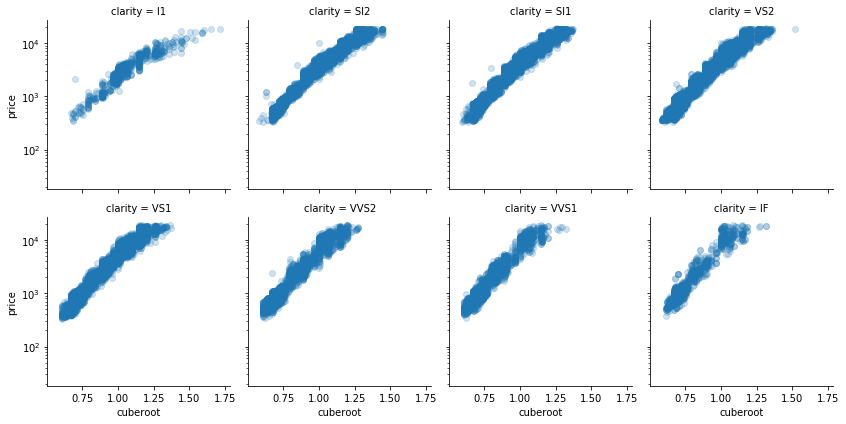

In [4]:
# multivariate plot of price by carat weight, and clarity
def get_cube_root(num):
    return num ** (1. / 3)

diamonds['cuberoot'] = diamonds['carat'].apply(lambda x: get_cube_root(x))

g = sb.FacetGrid(data=diamonds, col='clarity', col_wrap=4);
g.map(plt.scatter, 'cuberoot', 'price', alpha=1/5);
plt.yscale('log')

Price by Carat and Clarity Comment 1: With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.

Price by Carat and Clarity Comment 2: Across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes.

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, let's focus our visualization on only a small range of diamond weights. For this plot, I have selected diamonds in a small range around 1 carat weight.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


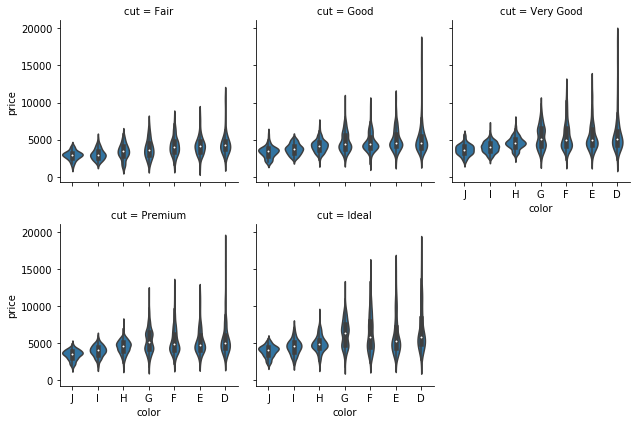

In [5]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
diamond_sub = diamonds[(diamonds["carat"] > 0.8) & (diamonds["carat"] < 1.2)]
g=sb.FacetGrid(data = diamond_sub, col='cut', col_wrap=3);
g.map(sb.violinplot, 'color', 'price');

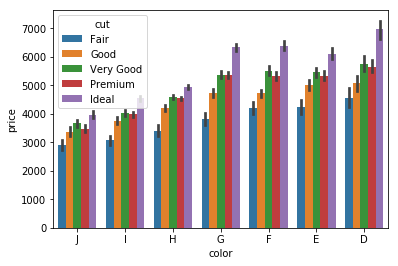

In [6]:
sb.barplot(data = diamond_sub,x='color', y='price', hue='cut');

Price by Cut and Color Comment 1: There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.